In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv('./dataset/credit-a.csv')

In [7]:
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,Class
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0.0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560.0,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824.0,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3.0,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0.0,+


In [43]:
x = data.iloc[:,[0,1,2,7,8,9,10,11,13,14]].replace('t',1).replace('f',0).replace('a',1).replace('b',0)
y = data.iloc[:,-1].replace('-',0).replace('+',1)

In [45]:
model = tf.keras.Sequential()

In [48]:
model.add(tf.keras.layers.Dense(4,input_shape=(10,),activation='relu'))
model.add(tf.keras.layers.Dense(4,activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
#sigmoid函数也叫Logistic函数，用于隐层神经元输出，取值范围为(0,1)，它可以将一个实数映射到(0,1)的区间.
#可以用来做二分类,在特征相差比较复杂或是相差不是特别大时效果比较好。

In [50]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 44        
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 69
Trainable params: 69
Non-trainable params: 0
_________________________________________________________________


In [51]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc']
             )
#binary_crossentropy交叉熵损失函数，一般用于二分类
#metrics评价函数

In [52]:
history = model.fit(x,y,epochs=100)

Train on 653 samples
Epoch 1/100
653/653 [==============================] - 0s 449us/sample - loss: 9.1459 - acc: 0.4472
Epoch 2/100
653/653 [==============================] - 0s 30us/sample - loss: 6.2891 - acc: 0.4472
Epoch 3/100
653/653 [==============================] - 0s 28us/sample - loss: 3.6148 - acc: 0.4518
Epoch 4/100
653/653 [==============================] - 0s 29us/sample - loss: 1.5218 - acc: 0.4916
Epoch 5/100
653/653 [==============================] - 0s 29us/sample - loss: 0.9182 - acc: 0.5804
Epoch 6/100
653/653 [==============================] - 0s 30us/sample - loss: 0.7203 - acc: 0.6401
Epoch 7/100
653/653 [==============================] - 0s 29us/sample - loss: 0.6710 - acc: 0.6784
Epoch 8/100
653/653 [==============================] - 0s 28us/sample - loss: 0.6495 - acc: 0.6968
Epoch 9/100
653/653 [==============================] - 0s 29us/sample - loss: 0.6413 - acc: 0.6968
Epoch 10/100
653/653 [==============================] - 0s 27us/sample - loss: 0.7112 -

653/653 [==============================] - 0s 29us/sample - loss: 0.5652 - acc: 0.7121
Epoch 83/100
653/653 [==============================] - 0s 29us/sample - loss: 0.5726 - acc: 0.7198
Epoch 84/100
653/653 [==============================] - 0s 28us/sample - loss: 0.5701 - acc: 0.7243
Epoch 85/100
653/653 [==============================] - 0s 28us/sample - loss: 0.5794 - acc: 0.7259
Epoch 86/100
653/653 [==============================] - 0s 28us/sample - loss: 0.5737 - acc: 0.7044
Epoch 87/100
653/653 [==============================] - 0s 27us/sample - loss: 0.5726 - acc: 0.7305
Epoch 88/100
653/653 [==============================] - 0s 27us/sample - loss: 0.5643 - acc: 0.7320
Epoch 89/100
653/653 [==============================] - 0s 26us/sample - loss: 0.5698 - acc: 0.7274
Epoch 90/100
653/653 [==============================] - 0s 28us/sample - loss: 0.5695 - acc: 0.7198
Epoch 91/100
653/653 [==============================] - 0s 27us/sample - loss: 0.5648 - acc: 0.7121
Epoch 92/100


In [53]:
history.history.keys()
#history.history为一个字典

dict_keys(['loss', 'acc'])

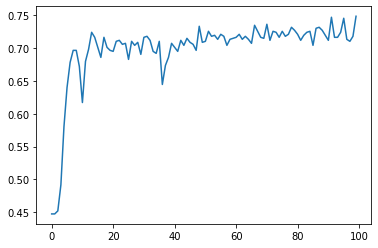

In [55]:
plt.plot(history.epoch,history.history.get('acc'))